In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
veriler = pd.read_csv("netflix-titles.csv")
veriler

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [19]:
veriler.shape

(5850, 15)

In [18]:
veriler.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [22]:
veriler.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [24]:
veriler.nunique()

id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                  1726
production_countries     452
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popularity         4889
tmdb_score               394
dtype: int64

In [26]:
data = veriler.copy()
data.shape

(5850, 15)

Text(0.5, 1.0, 'tür')

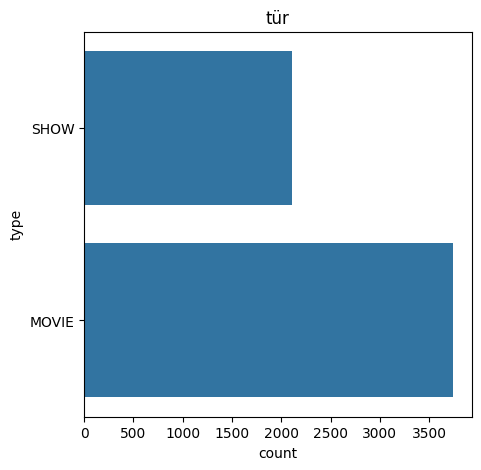

In [32]:
sns.countplot(data["type"])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("tür")

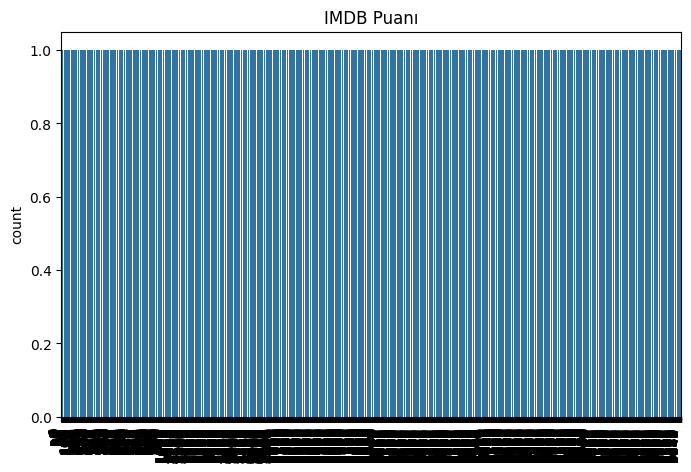

In [37]:
# imdb_score sütununa göre bir countplot çiz
sns.countplot(data["imdb_score"])

# x-ekseni etiketlerini 90 derece döndür ve hizala
plt.xticks(rotation=90, ha="right")

# Grafiği daha iyi görüntülemek için figür boyutlarını ayarla
fig = plt.gcf()
fig.set_size_inches(8, 5)  # İhtiyaca göre boyutları ayarlayabilirsiniz.

# Grafiğe başlık ekle
plt.title("IMDB Puanı")

# Grafiği göster
plt.show()

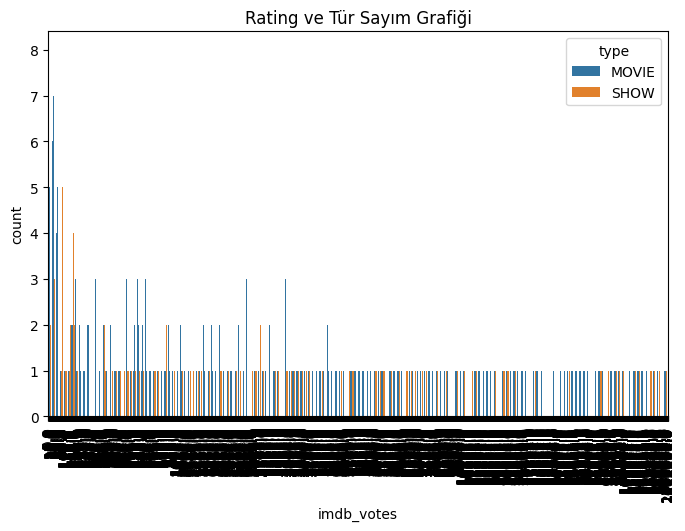

In [42]:
# Grafiği çiz
plt.figure(figsize=(8, 5))
sns.countplot(x="imdb_votes", hue="type", data=data)

# x-ekseni etiketlerini 90 derece döndür
plt.xticks(rotation=90)

# Grafiğe başlık ekle
plt.title("Rating ve Tür Sayım Grafiği")

# Grafiği göster
plt.show()

/tmp/ipykernel_17469/178190088.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=label)


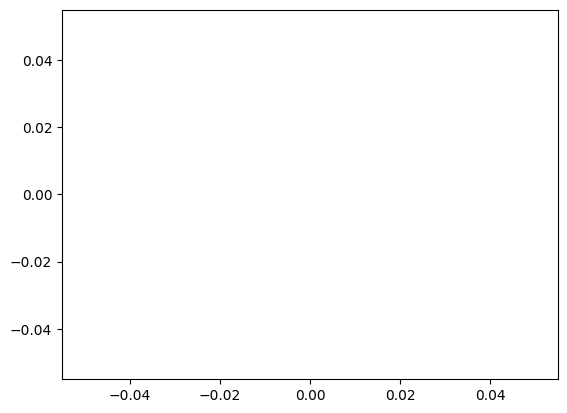

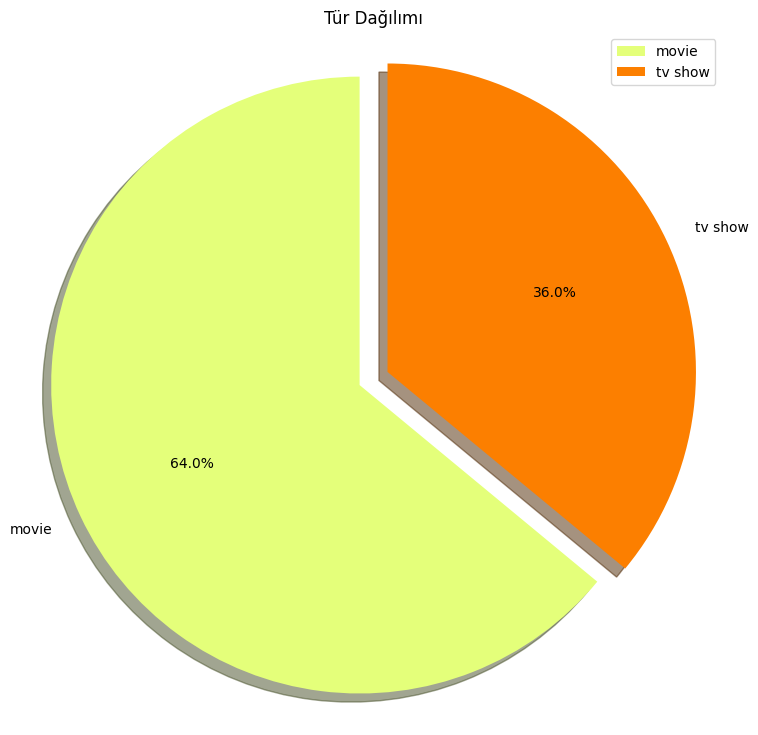

In [49]:
labels = ["movie", "tv show"]
size = data["type"].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, len(labels)))

# Renkleri görüntüleme amaçlı
for label, color in zip(labels, colors):
    plt.scatter([], [], c=color, label=label)

explode = [0, 0.1]
plt.figure(figsize=(9, 9))
plt.pie(size, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Tür Dağılımı")
plt.axis("equal")
plt.legend()
plt.show()
